In [5]:
from sympy import *
from scipy.integrate import odeint,solve_ivp  # 导入 scipy.integrate 模块
import numpy as np  # 导入 numpy包
import matplotlib.pyplot as plt  # 导入 matplotlib包

使用numpy求线性方程组的数值解

10x-1y-2z=72

-1x+10y-2z=83

-1x-1y+5z=42

In [6]:
a=np.array([[10,-1,-2],[-1,10,-2],[-1,-1,5]])
b=np.array([[72],[83],[42]])
c=np.linalg.solve(a,b)
c

array([[11.],
       [12.],
       [13.]])

In [7]:
np.linalg.inv(a).dot(b)

array([[11.],
       [12.],
       [13.]])

## 使用sympy进行运算

In [8]:
init_session()

IPython console for SymPy 1.10.1 (Python 3.7.6-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.10.1/



In [9]:
1+3

In [10]:
sqrt(2)

In [11]:
float(sqrt(2))

In [12]:
radius = 10
height = 100
area = pi * radius**2
volume = area * height
volume

In [13]:
integrate(sin(x), x)

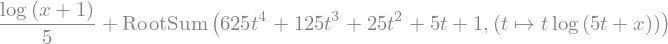

In [14]:
integrate(1/(1+x**5), x)

In [15]:
integrate(sin(x), (x, 0, pi))

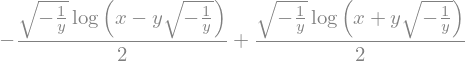

In [16]:
integrate(1/(x**2 + y), x)

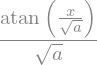

In [19]:
a = symbols("a", positive=True)
integrate(1/(x**2 + a), x)

使用sympy可以迅速求解符号方程的解与解集，例如：

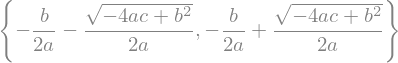

In [20]:
a, b, c = symbols("a b c")
solveset(a*x**2 + b*x + c, x)

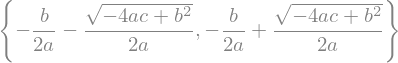

In [21]:
solveset(Eq(a*x**2 + b*x, -c), x)

In [22]:
x = Symbol('x')
y = Symbol('y')
print(solve(x*2-2,x)) # solve函数解方程的时候，往往将方程的右边化为0，例如解方程2x=2需要化简为2x-2=0
print(solve([x+y-35,x*2+y*4-94],x,y)) # solve函数解方程组的时候，往往使用列表表示方程组，后面是方程组里面的变量
print(solve(x**2+x-20,x))

[1]
{x: 23, y: 12}
[-5, 4]


In [24]:
d=solve([x+y-35,x*2+y*4-94],x,y)
d[x]

In [25]:
a, b, c, d = symbols('a, b, c, d', real=True)
nonlinsolve([a**2 + a + b , a - b], [a, b])

In [26]:
nonlinsolve([sin(a)-a] , [a])

sympy也可以进行微分运算

In [27]:
f = lambda x: x**2
f(x).diff(x)

In [28]:
f(x).diff(x,2)

In [29]:
g = lambda x: sin(x)
diff(f(g(x)),x,1)

## 针对二维steward平台建模问题的分析
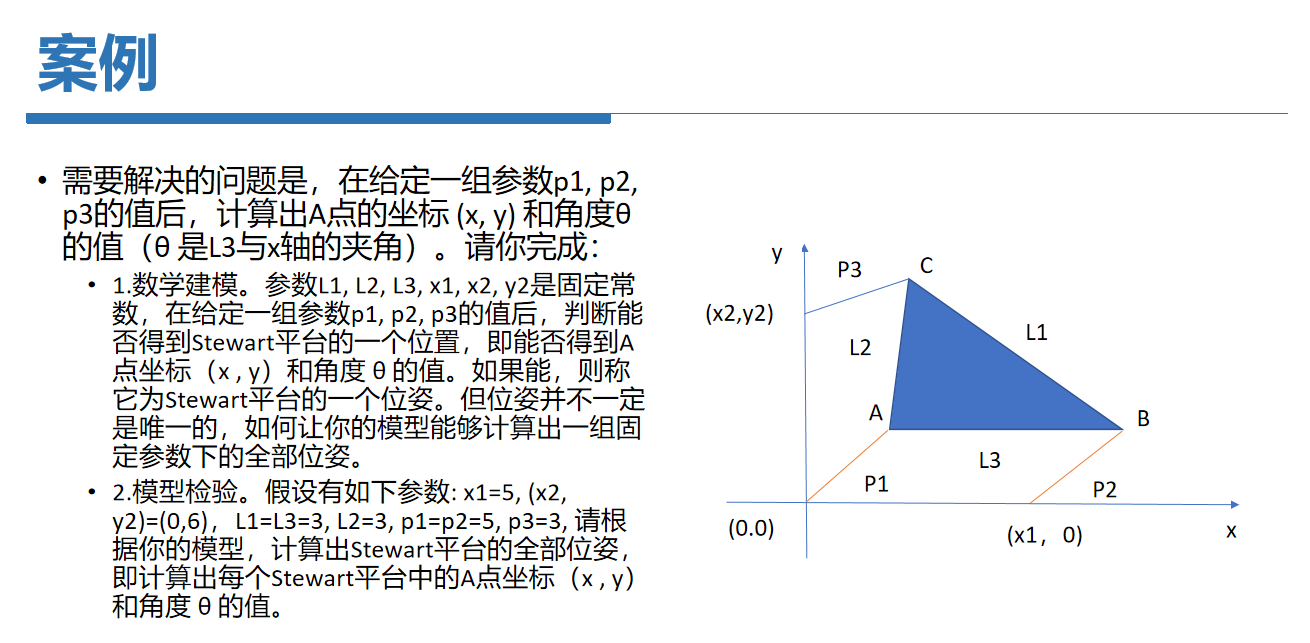

面对这一问题，主要通过三个坐标点的距离公式来写出。

首先，OA距离是固定的，所以有：
$$ 
x^2+y^2=p^2_1 
$$

其次，由于三角形形状固定，记CAB为$ \beta $，那么
$$
\cos\beta =\frac{L^2_2+L^2_3-L^2_1}{2L_2L_3}
$$

那么很显然，由三角函数的知识，可以写出B坐标为$ (x+L_3\cos\theta, y+L_3\sin\theta) $, C坐标为$ (x+L_2\cos(\beta+\theta), y+L_2\cos(\beta+\theta)) $。
由BC到DE的距离公式，有：
$$
(x_B-x_1)^2+y^2_B=p^2_2\\
(x_C-x_2)^2+(y_C-y_2)^2=p^2_1
$$

列出代码如下

In [30]:
x,y,theta=symbols('x, y, theta',real=True)
L1=3
L2=3
L3=3
p1=5
p2=5
p3=3
x1=5
x2=0
y2=6
b=np.arccos((L2**2+L3**2-L1**2)/(2*L2*L3))
print(b)

1.0471975511965979


如果还用sympy会发生什么呢

In [31]:
nonlinsolve([(x+3*cos(theta)-5)**2+(y+3*sin(theta))**2-25, x**2+y**2-25, (x+3*cos(pi/3+theta))**2+(y+3*sin(pi/3+theta)-6)**2-9],[x,y,theta])

KeyboardInterrupt: 

In [32]:
from scipy.optimize import fsolve
from math import sin,cos,pi
def f(ax):
    x,y,theta=ax[0],ax[1],ax[2]
    return [(x+3*cos(theta)-5)**2+(y+3*sin(theta))**2-25, x**2+y**2-25, (x+3*cos(pi/3+theta))**2+(y+3*sin(pi/3+theta)-6)**2-9]
result=fsolve(f,[-1.37,4.80,0.12])
result

array([1.15769945, 4.86412705, 0.02143414])

## 使用Scipy求方程数值解
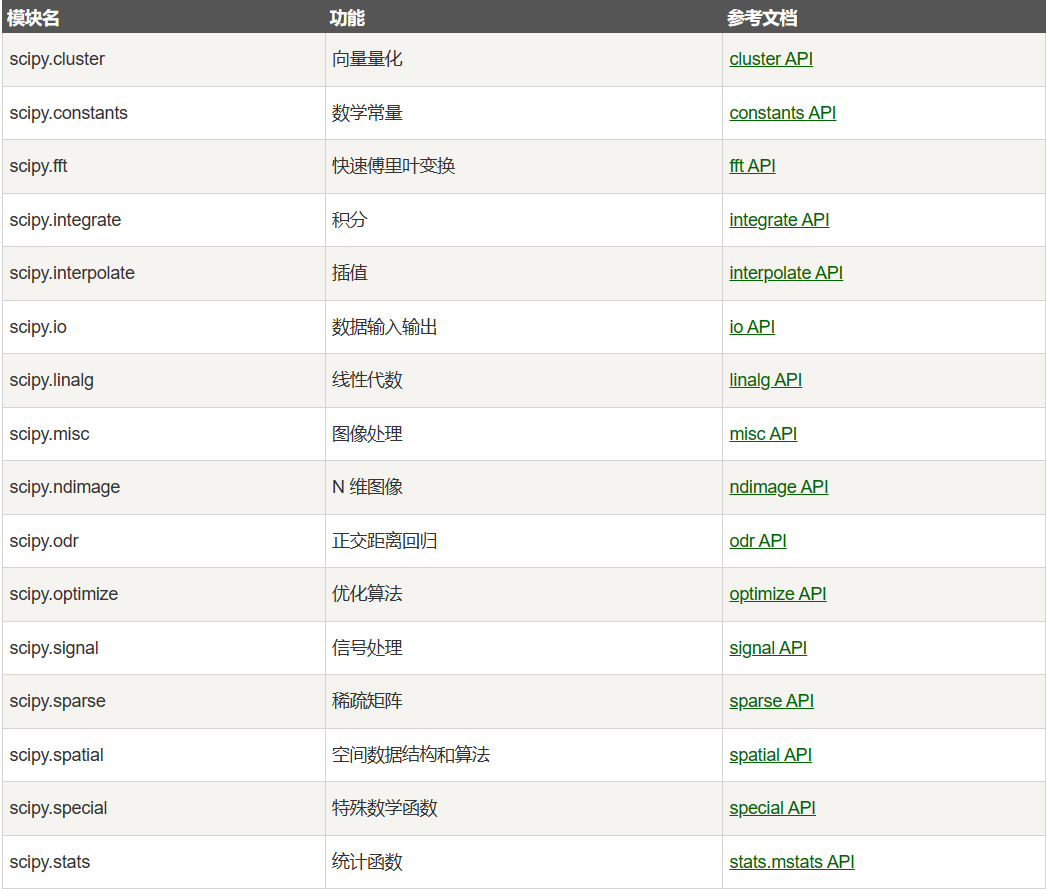

In [33]:
from scipy.optimize import root
from math import cos

def eqn(x):
    return x + cos(x)

myroot = root(eqn, 0)

print(myroot)
# 查看更多信息
#print(myroot)

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.66786593e-13])
       r: array([-1.67361202])
  status: 1
 success: True
       x: array([-0.73908513])


In [38]:
def eqn(x):
    return sin(x)-x+0.5

myroot = root(eqn, 5)

print(myroot)

    fjac: array([[-1.]])
     fun: array([-3.86357613e-14])
 message: 'The solution converged.'
    nfev: 14
     qtf: array([-6.88786606e-09])
       r: array([0.92656501])
  status: 1
 success: True
       x: array([1.49730039])


In [39]:
def eqn(x):
    return sin(x)-x+0.5

myroot = fsolve(eqn, 1)

print(myroot)

[1.49730039]


使用scipy求解微积分问题

In [40]:
# 计算3*x**0到3*x**14的积分结果
from scipy.integrate import quad
import matplotlib.pyplot as plt
 
def func(x, n, k):
    return k * x ** n
 
data = quad(func, 0, 2, args=(2, 3))
print(data)

(8.0, 8.881784197001252e-14)


In [41]:
help(dblquad)

Help on function dblquad in module scipy.integrate.quadpack:

dblquad(func, a, b, gfun, hfun, args=(), epsabs=1.49e-08, epsrel=1.49e-08)
    Compute a double integral.
    
    Return the double (definite) integral of ``func(y, x)`` from ``x = a..b``
    and ``y = gfun(x)..hfun(x)``.
    
    Parameters
    ----------
    func : callable
        A Python function or method of at least two variables: y must be the
        first argument and x the second argument.
    a, b : float
        The limits of integration in x: `a` < `b`
    gfun : callable or float
        The lower boundary curve in y which is a function taking a single
        floating point argument (x) and returning a floating point result
        or a float indicating a constant boundary curve.
    hfun : callable or float
        The upper boundary curve in y (same requirements as `gfun`).
    args : sequence, optional
        Extra arguments to pass to `func`.
    epsabs : float, optional
        Absolute tolerance passe

In [42]:
# 计算{{3*(x**2)*(y**2)dxdy 的积分
from scipy.integrate import dblquad
def fun(x, y):
    return 3 * (x ** 2) * (y ** 2)
def y_area(x):
    return 1 - x ** 2
data = dblquad(fun, 0, 1, gfun=0, hfun=y_area)
print(data[0])

0.050793650793650794
